In [24]:
### Here we have the IRIS dataset, consisting of 50 samples each of the 3 flower classes.
### We'll visualize the data using a few methods, consider feature selection, and
### fit the data using a supervised learning algorithm.


import sys
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns

In [7]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [8]:
print("Keys of iris_data:\n{}".format(iris_data.keys()))

Keys of iris_data:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [12]:
#let's take a look at the DESCR of this data set

print(iris_data['DESCR'][:200] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes
...


In [13]:
# Missing potentialy useful stuff...find where it gets boring then slice before then
# (I know where to slice based on a past glance at the entire dataset)  #

iris_data['DESCR'].find('Missing')

988

In [14]:
print(iris_data['DESCR'][:986] + "\n end")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

   
 end


In [15]:
print(iris_data['target_names'])
print(iris_data['feature_names'])
print("Shape of data:{}".format(iris_data['data'].shape))

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data:(150, 4)


In [16]:
#Take a look at data

print("First five rows of data:\n{}".format(iris_data['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [102]:
# Split data set into training and testing sets for later training.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size = 0.3, random_state=0)

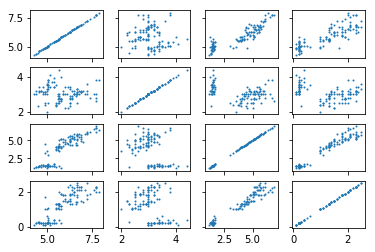

In [20]:
# Visualize the data, taking a look at how the points in general relate to the features.

fig, axes = plt.subplots(nrows=4, ncols=4,sharex='col',sharey='row')
for i in range(4):
    for j in range(4):
        ax = axes[j,i]
        ax.scatter(X_train[:, i], X_train[:, j], marker='.', s=4)
plt.show()

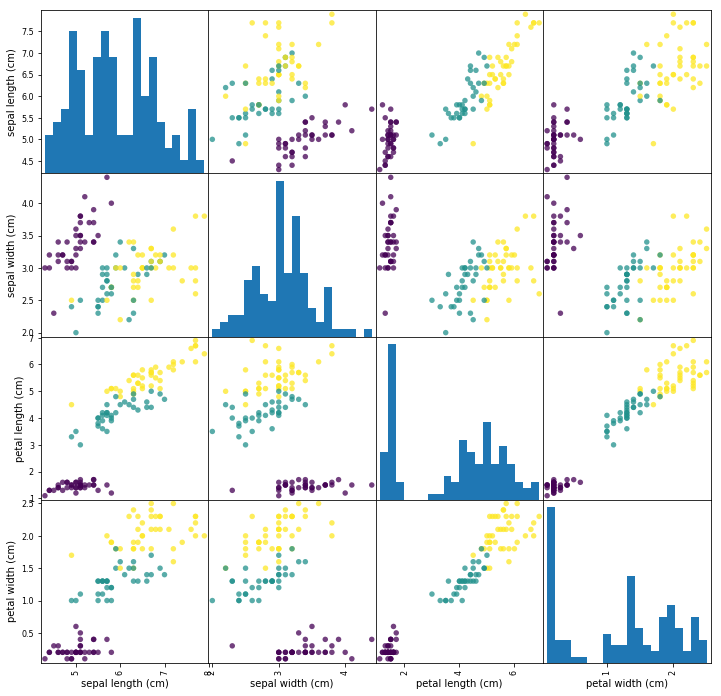

In [57]:
### Or, trying with pandas and visualizing classes and how they cluster.  ###

iris_dataframe = pd.DataFrame(X_train, columns = iris_data.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (12, 12), marker = 'o', s = 30, alpha = 0.75, hist_kwds = {'bins':20}, cmap = 'viridis')
plt.show()

In [96]:
#sns.pairplot(iris_dataframe, hue="target_names", size=3)

In [52]:
#To work with dataframes in more straightforward way, import as from beginning#

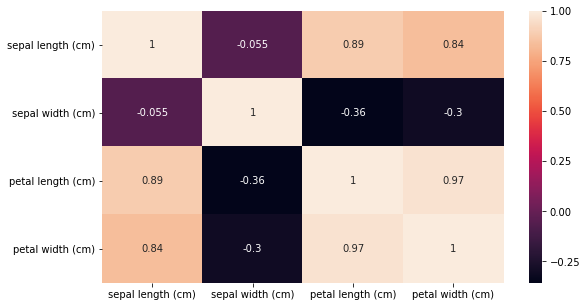

In [56]:
#Looking at the correlations between features.  If we see highly correlated features, we might choose
#to reduce the dimensionality of our feature space.  Since so low dim, let's just keep them all for now.

plt.figure(figsize=(9,5)) 
sns.heatmap(iris_dataframe.corr(),annot=True)
plt.show()

In [123]:
# Testing this on a SVM for classification

from sklearn import svm
from sklearn import metrics

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
#Let's see how good our SVM did

prediction = clf.predict(X_test)
print('The accuracy of SVM is:', metrics.accuracy_score(prediction, y_test))

The accuracy of SVM is: 0.977777777778
